In [60]:
import pickle
with open('C:\\Users\\user\\Desktop\\Assignments_Editing_Ipynbs_Only\\data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
Y = data[:, -1]
print(X.shape, Y.shape)

(506, 6)
(506, 5) (506,)


In [61]:
def forward_propagation(x,y,w):
        exp_value=math.exp(pow((w[0]*x[0]+w[1]*x[1]),2)+w[5])
        #print(exp_value)
        tanh_value=np.tanh(exp_value+w[6])
        #print(tanh_value)
        sigmoid_value=(1/(1+math.exp((-math.sin(w[2]*x[2]))*(w[3]*x[3]+w[4]*x[4])+w[7])))
        y_dash=tanh_value+(sigmoid_value*w[8])
        dloss=y_dash-y
        return dloss,y_dash,exp_value,tanh_value,sigmoid_value

In [62]:
def backward_propagation(dloss,y_dash,exp_value,tanh_value,sigmoid_value,x,w):
        dw=[]
        dw.append((dloss)*(1-pow(tanh_value,2))*(exp_value)*((2*w[0]*x[0]*x[0])+(2*w[1]*x[0]*x[1])))
        dw.append((dloss)*(1-pow(tanh_value,2))*(exp_value)*((2*w[1]*x[1]*x[1])+(2*w[0]*x[0]*x[1])))
        dw.append((dloss)*(sigmoid_value*(1-sigmoid_value))*(w[3]*x[3]+w[4]*x[4])*(math.cos(w[2]*x[2]))*x[2]*w[8])
        dw.append((dloss)*(sigmoid_value*(1-sigmoid_value))*(x[3]*(math.sin(w[2]*x[2])))*w[8])
        dw.append((dloss)*(sigmoid_value*(1-sigmoid_value))*(x[4]*(math.sin(w[2]*x[2])))*w[8])
        dw.append((dloss)*(1-pow(tanh_value,2))*(exp_value))
        dw.append((dloss)*(1-pow(tanh_value,2)))
        dw.append((dloss)*sigmoid_value*(1-sigmoid_value)*(-w[8]))
        dw.append((dloss)*sigmoid_value)
        return dw

In [63]:

from tqdm import tqdm
import numpy as np
import math as math
weights=np.random.normal(0, 0.1, size=(9))
dw_approx=[]
gradient_check=[]
learning_rate=0.2
dloss,y_dash,exp_value,tanh_value,sigmoid_value=forward_propagation(X[0],Y[0],weights)
dw=backward_propagation(dloss,y_dash,exp_value,tanh_value,sigmoid_value,X[0],weights)
print('dw values:',dw,'\n')
ep=0.0001
for i in range(len(weights)):
    weights[i]=weights[i]+ep
    dloss,y_dash_plus,exp_value,tanh_value,sigmoid_value=forward_propagation(X[0],Y[0],weights)
    f_plus=(Y[0]-y_dash_plus)*(Y[0]-y_dash_plus)/2
    
    weights[i]=weights[i]-(2*ep)
    dloss,y_dash_minus,exp_value,tanh_value,sigmoid_value=forward_propagation(X[0],Y[0],weights)
    f_minus=(Y[0]-y_dash_minus)*(Y[0]-y_dash_minus)/2
    dw_approx.append((f_plus-f_minus)/(ep*2))
    gradient_check.append((dw[i]-dw_approx[i])/(dw[i]+dw_approx[i]))
    weights[i]=weights[i]+ep
print('dw_approx:',dw_approx,'\n')
print('gradient_check: ',gradient_check)

dw values: [0.15692920829045062, 0.014623395823568046, 0.0001645859333712224, 0.0001213240103316235, 2.624785749793553e-05, -0.40953401164623676, -0.3693977015227814, -0.02645723928157412, -0.536189510702581] 

dw_approx: [0.15692920525944842, 0.014623395821478091, 0.00016458593321555526, 0.00012132401083775335, 2.6247857776162675e-05, -0.40953401085230823, -0.36939770366728464, -0.02645723925776, -0.536189510702556] 

gradient_check:  [9.657227808377951e-09, 7.14592892985207e-11, 4.729053775293313e-10, -2.0858601865088924e-09, -5.299997219025387e-09, 9.693072030873825e-10, -2.9027024621255846e-09, 4.5004917372574363e-10, 2.3294019703345868e-14]


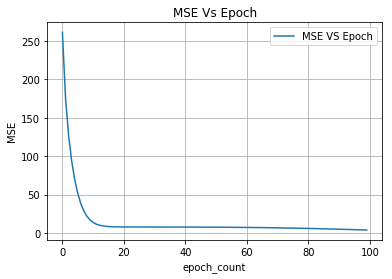

In [91]:
#Vanilla Update
weights=np.random.normal(0, 0.1, size=(9))
learning_rate=0.001
loss=0
epoch=100
epoch_count=[]
MSE=[]
for j in (range(epoch)):
    loss=0
    for i in range(len(X)):
        dloss,y_dash,exp_value,tanh_value,sigmoid_value=forward_propagation(X[i],Y[i],weights)
        dw=backward_propagation(dloss,y_dash,exp_value,tanh_value,sigmoid_value,X[i],weights)
        loss=loss+((Y[i]-y_dash)*(Y[i]-y_dash))
        for k in range(len(weights)):
            weights[k] = weights[k]-learning_rate*dw[k]
    MSE.append(loss/2)
    epoch_count.append(j)
import matplotlib.pyplot as plt
plt.plot(epoch_count, MSE,label='MSE VS Epoch')
plt.legend()
plt.xlabel("epoch_count")
plt.ylabel("MSE")
plt.title("MSE Vs Epoch")
plt.grid()
plt.show()


In [120]:
#Momentun Update:
velocity=np.zeros(9,dtype=float)
weights=np.random.normal(0, 0.1, size=(9))
MSE=[]
epoch_count=[]
learning_rate=1
gamma=0.9
for j in (range(100)):
    loss=0
    for i in range(len(X)):
        dloss,y_dash,exp_value,tanh_value,sigmoid_value=forward_propagation(X[i],Y[i],weights)
        dw=backward_propagation(dloss,y_dash,exp_value,tanh_value,sigmoid_value,X[i],weights)
        loss=loss+((Y[i]-y_dash)*(Y[i]-y_dash))
        print('dw:',dw)
        for k in range(len(weights)):
            velocity[k] = (gamma * velocity[k]) + (learning_rate * dw[k])
            weights[k] = weights[k]+velocity[k]
        print('velocity:',velocity)
        print('weights:',weights)
    MSE.append(loss/2)
    epoch_count.append(j)           
            
plt.plot(epoch_count, MSE,label='MSE VS Epoch')
plt.legend()
plt.xlabel("epoch_count")
plt.ylabel("MSE")
plt.title("MSE Vs Epoch")
plt.grid()
plt.show()

dw: [0.19656390297962803, 0.01831674160094161, -0.000971811401133237, -0.0016455615424670344, -0.0003560092083396904, -0.5156804493537104, -0.4853221214205001, -0.01728089254562247, -0.6246028282148356]
dw: [-0.07656257711383407, 0.04737463217027542, -0.0012754449717718164, -0.010751582432574118, -0.008061128792794178, -1.3233784270461741, -2.1270072358871057, -0.36217067250227086, -1.1806433599045398]
dw: [-0.0006603713637758242, -0.0002958208489599165, -0.022101955173400665, -0.07398786265113647, -0.055473293691855406, -0.0044041283742652934, -0.04171973232693333, -2.439458253521023, -2.8173142217594993]
dw: [-2.0966335745140977e-05, -1.2993101228492923e-05, 0.04137746410737575, 0.0319473416313731, 0.02412506355636008, -1.757351860531479e-05, -0.0006892350666703915, -2.0376817543180374, -8.963888685518063]
dw: [-2.2102662869821155e-07, -8.645363377398238e-08, 0.004715911832000276, 0.002151656919196571, 0.0016248256435873016, -1.533302304881667e-07, -2.333764385794649e-05, -0.16288156

dw: [-0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -2.605178661103635e+33]
dw: [-0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -6.634310489775414e+33]
dw: [-0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -1.689483962535543e+34]
dw: [-0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -4.302415547273288e+34]
dw: [-0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -1.0956469520810546e+35]
dw: [-0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -2.7901587617804624e+35]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -7.105378152290391e+35]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.8094453756039718e+36]
dw: [-0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -4.6079075555453837e+36]
dw: [-0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.1734431073038039e+37]
dw: [0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -2.988273331181947e+37]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -7.609893863854223e+37]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.9379246207113494e+38]
dw: [-0.0, 0.0, -0

dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.8169033476356895e+77]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -4.626899919800937e+77]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.1782796754550597e+78]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -3.000590066037589e+78]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -7.641259483599455e+78]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.945912144300459e+79]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -4.95543186494738e+79]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.261943147847699e+80]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -3.213646260913063e+80]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -8.183825323584954e+80]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -2.0840811803574614e+81]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -5.307291143913992e+81]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.3515471255028863e+82]
dw: [-0.0, -0.0, -0.0,

dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -4.9758566165050323e+120]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.2671444856880982e+121]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -3.226891913010032e+121]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -8.217556510609805e+121]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -2.0926711159059407e+122]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -5.329166150172346e+122]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.3571177831184455e+123]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -3.456016617527981e+123]
dw: [-0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -8.801042186024543e+123]
dw: [-0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -2.241260738369599e+124]
dw: [0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -5.707562344529629e+124]
dw: [-0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.4534796134603282e+125]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -3.701410268027285e+125]
dw: [-0.0, 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]


dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -2.4626639519612848e+154]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -6.271384582264008e+154]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.5970617731800467e+155]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -4.067054529818375e+155]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.0357102540611245e+156]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -2.6375248290936073e+156]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -6.7166827757164494e+156]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.7104607703393458e+157]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -4.3558347841696224e+157]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.1092506180786493e+158]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -2.824801661852817e+158]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -7.193599263102386e+158]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.8319116367329385e+159]
dw:

dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -6.744366856685457e+197]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.717510758561446e+198]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -4.373788182726502e+198]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.1138226047201555e+199]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -2.836444617243066e+199]
dw: [-0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -7.223249045756751e+199]
dw: [-0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -1.8394622077175818e+200]
dw: [-0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -4.68434798826288e+200]
dw: [-0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -1.1929093179016529e+201]
dw: [-0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -3.037845702971134e+201]
dw: [-0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -7.736134152504802e+201]
dw: [-0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -1.9700727909589905e+202]
dw: [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -5.01695902005564e+202]
dw: [-

dw: [-0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -1.724589804646078e+239]
dw: [-0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -4.391815579617962e+239]
dw: [-0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -1.1184134356710619e+240]
dw: [-0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -2.8481355612804632e+240]
dw: [-0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -7.253021035609388e+240]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.847043899811481e+241]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -4.7036554162484495e+241]
dw: [-0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.197826119729017e+242]
dw: [-0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -3.0503667597517895e+242]
dw: [0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -7.7680200955240735e+242]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.9781928193243205e+243]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -5.0376373674433624e+243]
dw: [-0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.2828774828193862e+244]
dw: [

dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -4.723042423457498e+282]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.2027631870869177e+283]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -3.0629394244408864e+283]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -7.800037462500345e+283]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.9863463159254204e+284]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -5.058400944558688e+284]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.2881651054887318e+285]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -3.2804227209070405e+285]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -8.353877295690558e+285]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -2.127386370868628e+286]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -5.417571518906871e+286]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -1.3796309671048162e+287]
dw: [-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -3.5133483679023484e+287]
dw: [

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: Run

dw: [nan, nan, nan, nan, nan, nan, nan, nan, -inf]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]

dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
velocity: [nan nan nan nan nan nan nan nan nan]
weights: [nan nan nan nan nan nan nan nan nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [

dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]


dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]
dw: [nan, nan, nan, nan, nan, nan, nan, nan, nan]

KeyboardInterrupt: 

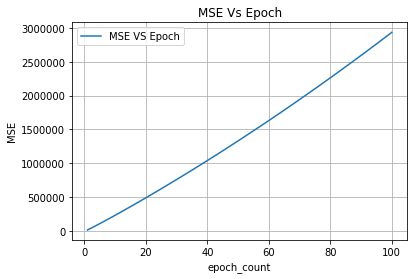

In [104]:
M = np.zeros(9,dtype=float)
R = np.zeros(9,dtype=float)
beta1 = 0.9
beta2 = 0.99
weights=np.random.normal(0, 0.1, size=(9))
learning_rate=0.001
eps=0.0000001
MSE=[]
epoch_count=[]
gamma=0.9
for j in (range(100)):
    j=j+1
    loss=0
    for i in range(len(X)):
        dloss,y_dash,exp_value,tanh_value,sigmoid_value=forward_propagation(X[0],Y[0],weights)
        dw=backward_propagation(dloss,y_dash,exp_value,tanh_value,sigmoid_value,X[0],weights)
        loss=loss+((Y[i]-y_dash)*(Y[i]-y_dash))
        for k in range(len(weights)):
            M[k] =(beta1*M[k])+((1-beta1)*dw[k])
            R[k] = (beta2*R[k])+((1-beta2)*dw[k]**2)
            m_k_hat = M[k]/(1-beta2**(j))
            r_k_hat = R[k] / (1 - beta2**(j))
            weights[k] = weights[k] +(learning_rate * m_k_hat / (np.sqrt(r_k_hat) + eps))
    MSE.append(loss/2)
    epoch_count.append(j)
plt.plot(epoch_count, MSE,label='MSE VS Epoch')
plt.legend()
plt.xlabel("epoch_count")
plt.ylabel("MSE")
plt.title("MSE Vs Epoch")
plt.grid()
plt.show()        